# IMPORTING LIBRARIES

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy.cluster.hierarchy import linkage, dendrogram

# CSV FILE SELCTION

In [202]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()


# DATA SET LOADING AND PREPROCESSING

In [203]:
# Load the dataset
data = pd.read_csv(file_path)

# Drop the Story_ID column (non-numeric data)
X = data.drop(columns=["Story_ID"])

data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,Story_1,1,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,0
1,Story_2,1,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,0
2,Story_3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,Story_4,1,0,1,1,0,0,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,Story_5,0,1,1,0,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [204]:
X.head()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,1,0,0,0,1,0,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
1,1,0,0,0,1,0,1,0,1,1,...,0,1,1,1,1,1,0,1,1,0
2,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,1,0
3,1,0,1,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0


In [205]:
X.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.600000,0.550000,0.600000,0.450000,0.65000,0.600000,0.500000,0.400000,0.35000,0.550000,...,0.35000,0.450000,0.500000,0.500000,0.35000,0.250000,0.400000,0.800000,0.65000,0.500000
std,0.502625,0.510418,0.502625,0.510418,0.48936,0.502625,0.512989,0.502625,0.48936,0.510418,...,0.48936,0.510418,0.512989,0.512989,0.48936,0.444262,0.502625,0.410391,0.48936,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.500000,0.000000,0.00000,1.000000,...,0.00000,0.000000,0.500000,0.500000,0.00000,0.000000,0.000000,1.000000,1.00000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,0.250000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


# SCATTER PLOT FOR INITIAL VISUALIZATION

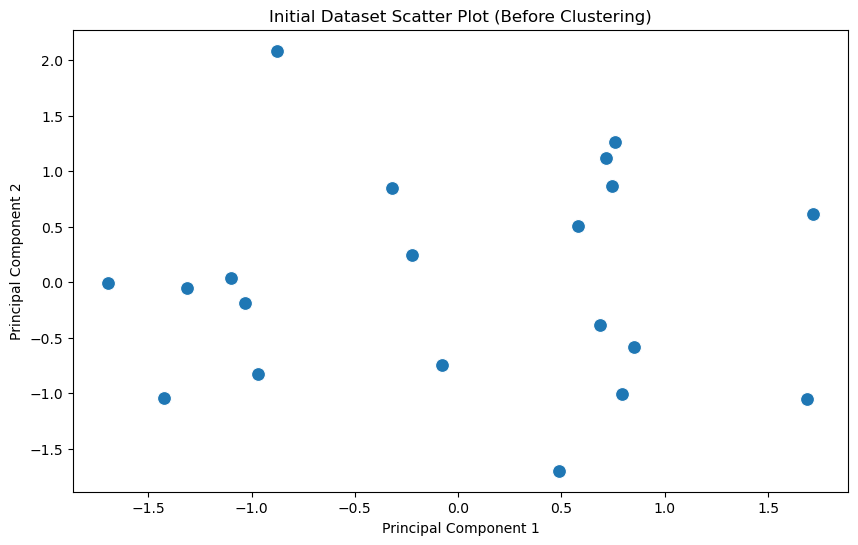

In [206]:
# Scatter plot of the dataset (initial visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], s=100)
plt.title("Initial Dataset Scatter Plot (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# HDBSCAN Clustering

In [265]:
# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric="euclidean")
labels = clusterer.fit_predict(X)


# Add cluster labels to the dataset
data["Cluster"] = labels

# SCATTER PLOT AFTER CLUSTERING

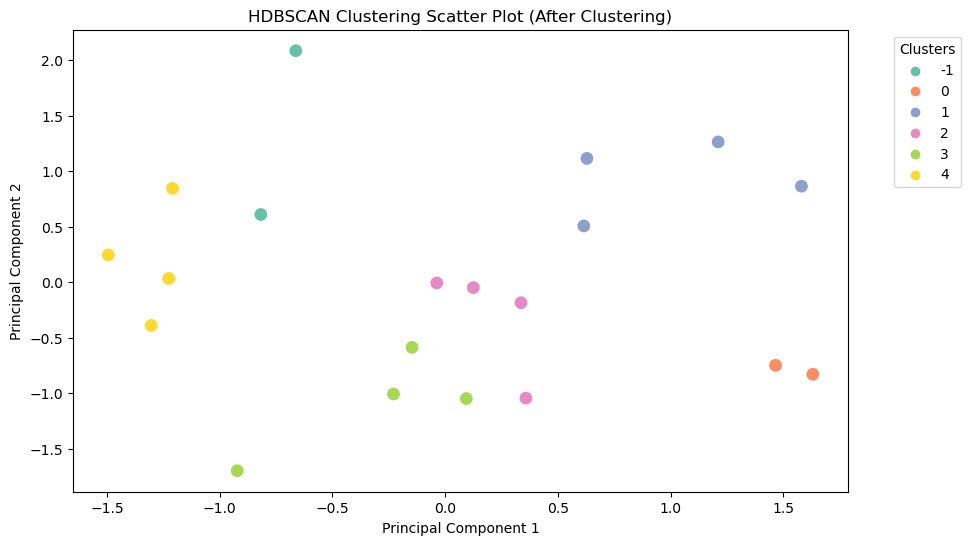

In [266]:
'''So what i did here is to re fit_predict the HDBSCAN model with adiffrent data set which is the X_pca in other for us to visualize the real beuty of the HBSCAN clustering'''
def plot_dendrogram():    
    labels_pca = clusterer.fit_predict(X_pca)

    # Scatter plot after clustering
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 2], hue=labels_pca, palette="Set2", s=100)
    plt.title("HDBSCAN Clustering Scatter Plot (After Clustering)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_dendrogram()

# DENDOGRAM DERIVED FROM THE MEMBERSHIP PROBABILITY OF EACH STORY IN EACH CLUSTER

# Dendogram with noise

Cluster Ranking:
    Story  Cluster  Membership_Probability
0       5        0                1.000000
1       7        0                1.000000
2      17        0                0.834429
3       1        1                1.000000
4       2        1                1.000000
5       6        1                0.440559
6      16        1                0.000000
8       8        2                1.000000
10     13        2                1.000000
11     15        2                1.000000
12     19        2                1.000000
7       4        2                0.000000
9      11        2                0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_4148\2172957885.py:47: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method="average")


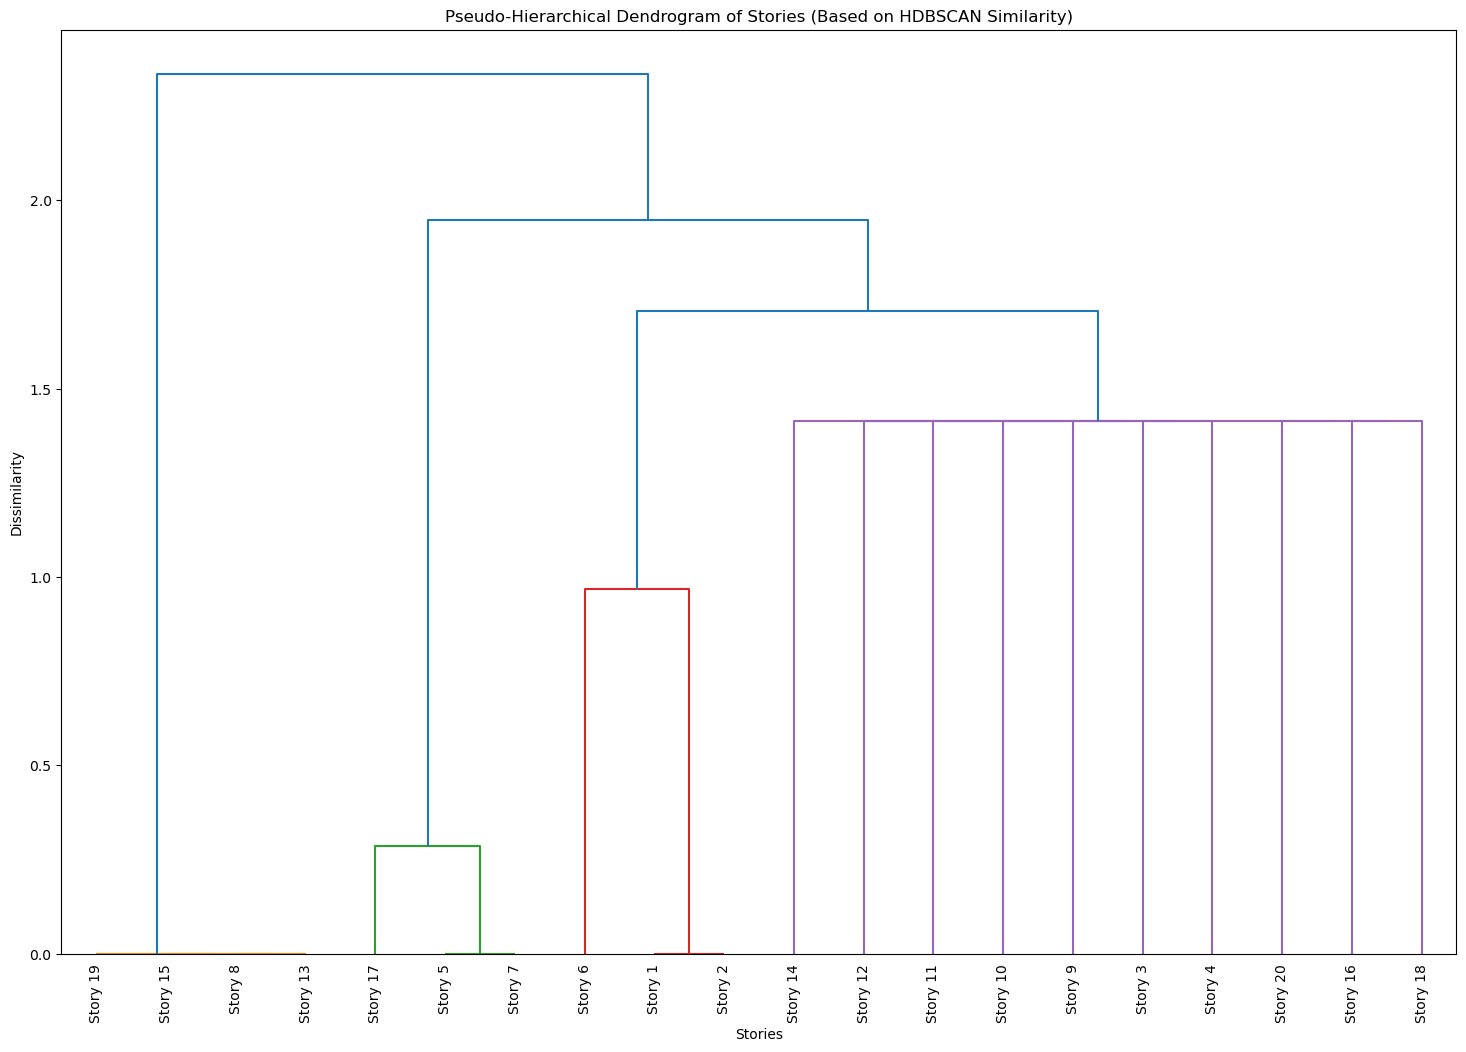

In [264]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Apply HDBSCAN clustering
probabilities = clusterer.probabilities_

# Rank Stories Within Clusters
cluster_data = []
for cluster in np.unique(labels):
    if cluster != -1:  # Exclude noise
        cluster_stories = np.where(labels == cluster)[0]
        cluster_probs = probabilities[labels == cluster]
        for idx, prob in zip(cluster_stories, cluster_probs):
            cluster_data.append({
                "Story": idx + 1,
                "Cluster": cluster,
                "Membership_Probability": prob
            })

# Convert ranking into a DataFrame
cluster_ranking = pd.DataFrame(cluster_data).sort_values(by=["Cluster", "Membership_Probability"], ascending=[True, False])
print("Cluster Ranking:")
print(cluster_ranking)

# Construct Similarity Matrix Using HDBSCAN Clusters
num_stories = len(X)
similarity_matrix = np.zeros((num_stories, num_stories))

for i in range(num_stories):
    for j in range(num_stories):
        if i == j:
            similarity_matrix[i, j] = 1.0  # Perfect similarity with itself
        elif labels[i] == labels[j] and labels[i] != -1:  # Same cluster, exclude noise
            # Use product of membership probabilities as similarity
            similarity_matrix[i, j] = probabilities[i] * probabilities[j]
        else:
            similarity_matrix[i, j] = 0.0  # Different clusters or noise

# Convert similarity to dissimilarity (1 - similarity)
dissimilarity_matrix = 1 - similarity_matrix

# Generate Pseudo-Hierarchical Linkage
linkage_matrix = linkage(dissimilarity_matrix, method="average")

# Plot Dendrogram for Stories
plt.figure(figsize=(18, 12))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in range(len(X))], leaf_rotation=90, leaf_font_size=10)
plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on HDBSCAN Similarity)")
plt.xlabel("Stories")
plt.ylabel("Dissimilarity")
plt.show()

# Dendogram with out noise

Cluster Ranking:
    Story  Cluster  Membership_Probability
0       5        0                1.000000
1       7        0                1.000000
2      17        0                1.000000
3      10        1                1.000000
4      14        1                1.000000
7       6        2                1.000000
8      16        2                1.000000
6       2        2                0.953463
5       1        2                0.877058
9       4        3                1.000000
10      8        3                1.000000
12     13        4                1.000000
14     19        4                1.000000
13     15        4                0.904534
11     11        4                0.866025


C:\Users\HP\AppData\Local\Temp\ipykernel_4148\3225022459.py:53: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method="average")


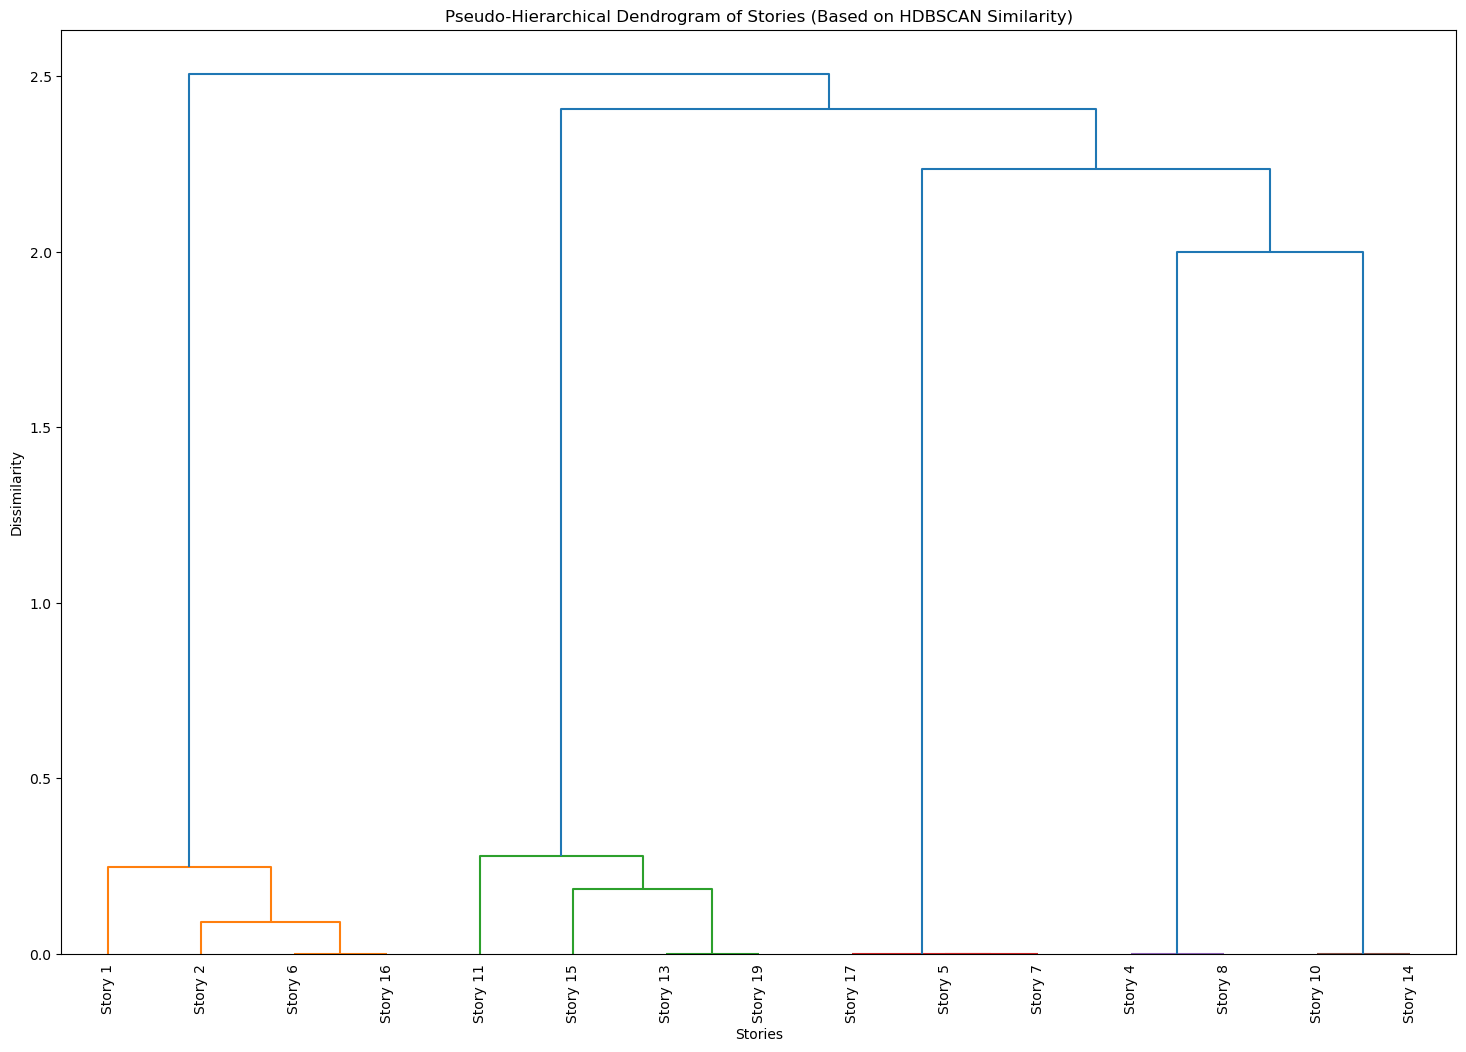

In [247]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Apply HDBSCAN clustering
probabilities = clusterer.probabilities_

# Rank Stories Within Clusters
cluster_data = []
for cluster in np.unique(labels):
    if cluster != -1:  # Exclude noise
        cluster_stories = np.where(labels == cluster)[0]
        cluster_probs = probabilities[labels == cluster]
        for idx, prob in zip(cluster_stories, cluster_probs):
            cluster_data.append({
                "Story": idx + 1,
                "Cluster": cluster,
                "Membership_Probability": prob
            })

# Convert ranking into a DataFrame
cluster_ranking = pd.DataFrame(cluster_data).sort_values(by=["Cluster", "Membership_Probability"], ascending=[True, False])
print("Cluster Ranking:")
print(cluster_ranking)

# Filter out noise for similarity matrix
filtered_indices = np.where(labels != -1)[0]
filtered_X = X.iloc[filtered_indices]
filtered_labels = labels[filtered_indices]
filtered_probabilities = probabilities[filtered_indices]

# Construct Similarity Matrix Using HDBSCAN Clusters
num_stories = len(filtered_X)
similarity_matrix = np.zeros((num_stories, num_stories))

for i in range(num_stories):
    for j in range(num_stories):
        if i == j:
            similarity_matrix[i, j] = 1.0  # Perfect similarity with itself
        elif filtered_labels[i] == filtered_labels[j]:  # Same cluster
            # Use product of membership probabilities as similarity
            similarity_matrix[i, j] = filtered_probabilities[i] * filtered_probabilities[j]
        else:
            similarity_matrix[i, j] = 0.0  # Different clusters

# Convert similarity to dissimilarity (1 - similarity)
dissimilarity_matrix = 1 - similarity_matrix

# Generate Pseudo-Hierarchical Linkage
linkage_matrix = linkage(dissimilarity_matrix, method="average")

# Plot Dendrogram for Stories
plt.figure(figsize=(18, 12))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in filtered_indices], leaf_rotation=90, leaf_font_size=10)
plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on HDBSCAN Similarity)")
plt.xlabel("Stories")
plt.ylabel("Dissimilarity")
plt.show()


# HDBSCAN EVALUATION

In [248]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics:
Silhouette Score: 0.038450771743404
Calinski-Harabasz Score: 1.6034343107079214
Davies-Bouldin Score: 1.993681261451144
